(99, 1)
X_train :  [[53.42680403]
 [61.53035803]
 [47.47563963]
 [59.81320787]
 [55.14218841]
 [52.21179669]
 [39.29956669]
 [48.10504169]
 [52.55001444]
 [45.41973014]
 [54.35163488]
 [44.1640495 ]
 [58.16847072]
 [56.72720806]
 [48.95588857]
 [44.68719623]
 [60.29732685]
 [45.61864377]
 [38.81681754]
 [66.18981661]
 [65.41605175]
 [47.48120861]
 [41.57564262]
 [51.84518691]
 [59.37082201]
 [57.31000344]
 [63.61556125]
 [46.73761941]
 [50.55676015]
 [52.22399609]
 [35.56783005]
 [42.43647694]
 [58.16454011]
 [57.50444762]
 [45.44053073]
 [61.89622268]
 [33.09383174]
 [36.43600951]
 [37.67565486]
 [44.55560838]
 [43.31828263]
 [50.07314563]
 [43.87061265]
 [62.99748075]
 [32.66904376]
 [40.16689901]
 [53.57507753]
 [33.86421497]
 [64.70713867]
 [38.11982403]
 [44.50253806]
 [40.59953838]
 [41.72067636]
 [51.08863468]
 [55.0780959 ]
 [41.37772653]
 [62.49469743]
 [49.20388754]
 [41.10268519]
 [41.18201611]
 [50.18638949]
 [52.37844622]
 [50.13548549]
 [33.64470601]
 [39.55790122]
 [56.1

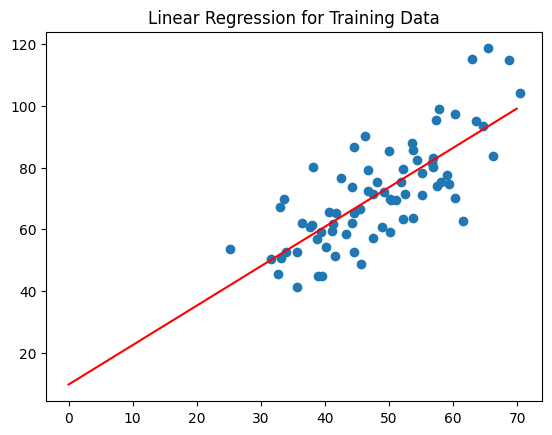

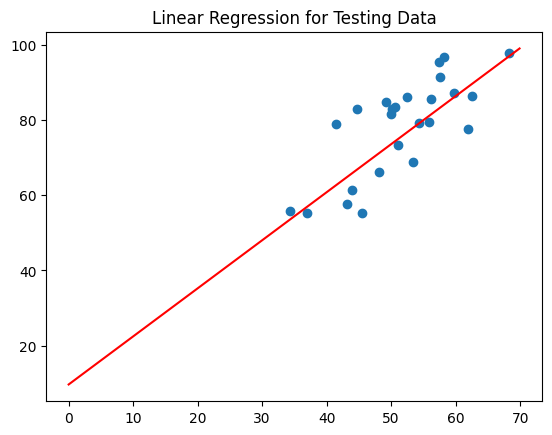

We need 4 functions
Now we don't need to convert to 2D array
test_size=0.3 , 30% goes to test and 70% goes to train
Defining the fit function
Storing the values of m and c
Test data prediction and score
Test Score:  0.6471991827205915
Training data prediction and score
Train Score:  0.5342655009517676
M , C :  1.2144191883196152 13.807303269146303
Cost on training data :  103.4112293322469
Cost by increasing m :  2672.833316168164


In [14]:
from IPython.display import HTML

html_content = """
<h1> Regression is something like when we give input , it tries to predict the output </h1>
<h2> The basic concept is when we give Xtrain and Ytrain , it tries to predict the function , <br>
so next time for any input , it uses the function to predict the output </h2>
<ul>
<li> Linear Regression : It tries to fit the data in a straight line 
<b> y = m1x1 + m2x2 + m3x3 + .... + b <br>
We have to find out the values of m1,m2,m3... and b </b> 

<ul>
<li> X_train :  Subset of actual data contatins specific input features. </li>
<li> Y_train :  Subset of actual data contains the output features of X_train. </li>
<li> X_test  :  The input features used for testing the model's performance.
<li> Y_test  :  Output of X_test , how the trained model predicts the actual output. </li>
</li>
</ul>
<br>
<img src="./LR.png" alt="Linear Regression" style="width:304px;height:228px;">
<br>
<b>fit takes 2D array as input , so we have to convert the 1D array to 2D array</b> <br>
<img src="./1D_2D.png" alt="1D to 2D" style="width:304px;height:228px;">
<p> so reshape(-1,1) will convert 1D array to 2D array : <b> -1 means as many rows as required and 1 means 1 column </b> </p>
<h3> reshape works with numpy , to use it with pandas , we have to use values </h3>
<br>
<h1>Regression Output : </h1>
<ul>
<li> Coefficient(m) : It gives the value of m1,m2,m3..., co_eff[0] , co_eff[1]... </li>
<li> Intercept(b) : It gives the value of b </li> 
</ul>
"""

display(HTML(html_content))


import numpy as np
import pandas as pd 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

df = pd.read_csv('./data.csv') 
x = df.iloc[: , 0].values.reshape(-1,1)
y = df.iloc[: , 1].values.reshape(-1,1)
print(y.shape)


print("X_train : ",x)
print("Y_train : ",y)
X_train , X_test , Y_train , Y_test = model_selection.train_test_split(x , y)
alg1 = LinearRegression()
alg1.fit(X_train , Y_train)

print("Coefficient(m) : ",alg1.coef_)
print("Intercept(b) : ",alg1.intercept_)
LinearRegression(copy_X=True , fit_intercept=True , n_jobs=1) 
#DBP_NOTES
# copy_X : If True , X will be copied , else it may be overwritten
# fit_intercept : If True , the intercept will be calculated , else it will be 0
# n_jobs : The number of jobs to use for the computation.
# n_jobs = -1 means using all processors
# n_jobs = 1 means using only one processor


alg1.coef_
alg1.intercept_
alg1.predict(X_test)


m = alg1.coef_
b = alg1.intercept_

print("m1 : ", m[0])
print("b : ",b)

#To show graph
m0 = m[0]
x_line = np.arange(0,70,0.1)
y_line = m0*x_line + b
plt.scatter(X_train , Y_train)
plt.plot(x_line , y_line , color = 'red') 
plt.title("Linear Regression for Training Data")
plt.show() 


plt.scatter(X_test , Y_test)
plt.plot(x_line , y_line , color = 'red')
plt.title("Linear Regression for Testing Data")
plt.show()



html_content2 = """

<h1>Coefficient of Determination :</h1> <h2> To model n number of data points , we have to find the best fit line</h2> <br>
<img src="./CD.png" alt="Coefficient of Determination"><br><br>
<img src="./CD3.png" alt="Coefficient of Determination">
<h2>Coefficient of Determination : 1 - (u/v) </h2>
<ul>
<li> Best prediction : YiT = YiP , u = 0 </li>
<li> score > 0 means model is good </li>
<li> score < 0 means model is bad </li>
</ul>
<br><br>
<h1>Cost Function:</h1>
<img src="./Detaild.png" alt="Cost Function">
<br><br>
<img src="./LRW.png" alt="Cost Function">
<br><br>
<img src="./cona.png" alt="Cost Function">
<br><br>
<img src="./LRW1.png" alt="Cost Function">
<br><br>
<img src="./LRW2.png" alt="Cost Function">
<br><br>
<img src="./ff.png" alt="Cost">
"""

display(HTML(html_content2))

score_test = alg1.score(X_test , Y_test)
score_training = alg1.score(X_train , Y_train)
score_test , score_training 

print("We need 4 functions")
print("Now we don't need to convert to 2D array")
x1 = df.iloc[: , 0]
y1 = df.iloc[: , 1]
print("test_size=0.3 , 30% goes to test and 70% goes to train")
X_train , X_test , Y_train , Y_test = model_selection.train_test_split(x , y , test_size=0.3 ) #
X_train.shape
print("Defining the fit function")

def fit(X_train , Y_train):
    num = (X_train * Y_train).mean() - X_train.mean() * Y_train.mean() 
    den = (X_train**2).mean() - X_train.mean()**2
    m = num/den
    c = Y_train.mean() - m*X_train.mean()
    return m,c

def predict(x , m , c):
    return m*x + c  

def score(Y_truth , Y_predict):
    u = ((Y_truth - Y_predict)**2).sum() 
    v = ((Y_truth - Y_truth.mean())**2).sum()
    return 1 - u/v

def cost(x , y , m , c):
    return ((y - (m*x + c))**2).mean()

print("Storing the values of m and c")
m,c = fit(X_train , Y_train)

print("Test data prediction and score")
Y_pred = predict(X_test , m , c) 
print("Test Score: " ,score(Y_test , Y_pred))

print("Training data prediction and score")
Y_train_pred = predict(X_train , m , c) 
print("Train Score: " ,score(Y_train , Y_train_pred))

print("M , C : ",m,c)
print("Cost on training data : ",cost(X_train , Y_train , m , c))
print("Cost by increasing m : ",cost(X_train , Y_train , m+1 , c))

print("By using Linear Regression")

